# PREDATOR: **PRED**icting the imp**A**ct of cancer somatic mu**T**ations on pr**O**tein-protein inte**R**actions


## Model Development: Training Only


<b><i class="fa fa-folder-o" area-hidden="true" style="color:#1976D2"> </i>&nbsp; File Location</b><br>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">Predator\src</code>
</p>

<b><i class="far fa-file" area-hidden="true" style="color:#1976D2"> </i>&nbsp; File Name</b>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">PredatorStudyModel.ipynb</code>
</p>

<b><i class="far fa-calendar-alt" area-hidden="true" style="color:#1976D2"> </i>&nbsp; Last Edited</b>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">June 15th, 2022</code>
</p>


<div class="alert alert-block" style="background-color: #F5F5F5; border: 1px solid; padding: 10px; border-color: #E0E0E0">
    <b><i class="fa fa-compass" aria-hidden="true" style="color:#404040"></i></b>&nbsp; <b style="color: #404040">Purpose </b> <br>
<div>

    
- [x] $\textit{mutation effect label}$ prediction using Random Forest algorithm.
    

- [x] Classification will be $\textit{Disrupting vs (No effect + Increasing)}$.
    
- [x] Evaluate the performane of the model.
    
- [x] We use SHAP in feature selection
     
- [x] We measure the impact of randomization by repeating whole experiment with multiple runs. 
    
- [x] We use Predator object to conduct experiments.
    
**Dependent files:**
* Training (mutations) data:
    - *training_data_M1.txt*

In [1]:
import random
from helpers.start import executed_on

from helpers.helpers_predator.displayers import (
    display_label_counts,
    visualize_label_counts,
    display_data,
)
from helpers.helpers_predator.visualizers import (
    visualize_sampled_train_datasets_label_counts
)

from helpers.helpers_predator.common import predator_log

NUM_EXPERIMENT_REPEAT = 50 # 10, 25, 50

SEED = 42
random.seed(SEED)

# Generate random integers as many as num_experiment.
random_seeds = random.sample(range(1, 99999), NUM_EXPERIMENT_REPEAT)

# PATHS
PROJECT_COMMON_FILE_DIR = "../data/"
MUTATIONS_PATH = "training_data_M1.txt"
INITIAL_COLUMNS_PATH = "../data/initial_columns_59.csv"

N_CORES = 6

# Reflect changes in the modules immediately.
%load_ext autoreload
%autoreload 2

predator_log("Predator starts..")

executed_on()

June 15, 2022 21:36:36


In [2]:
from Predator import Predator

In [3]:
predator = Predator(
    project_common_file_dir=PROJECT_COMMON_FILE_DIR,
    mutations_path=MUTATIONS_PATH,
    initial_columns_path=INITIAL_COLUMNS_PATH,
    n_experiment=NUM_EXPERIMENT_REPEAT,
    eliminate_models=True,
    random_seeds=random_seeds
)

2022-06-15 21:36:37 | DEBUG    | Predator | Initializing Predator ..
2022-06-15 21:36:37 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `train_data` ..
2022-06-15 21:36:37 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `train_data_processed` ..


## Datasets

### Training Data: Mutations

In [4]:
display_data(predator.data_materials["train_data"])

Data dimensions: (1101, 104)


,Mutation_Effect_Label,Input_identifier,UniProt_ID,Mutation,Status,Type,COSMIC_mut_ID,ClinVar_mut_ID,UniProt_mut_ID,Domain_name,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,mutation decreasing rate(MI:1130),P63000,P63000,Q61L,done,interface,-,-,-,Ras,...,378.0,40.0165,40.2638,61.9441,61.9441,None,None,None,3.7681,3.21627
1,mutation decreasing rate(MI:1130),P63000,P63000,Q61L,done,interface,-,-,-,Ras,...,378.0,40.0165,40.2638,61.9441,61.9441,None,None,None,3.7681,3.21627
2,mutation decreasing rate(MI:1130),P63000,P63000,Q61L,done,interface,-,-,-,Ras,...,378.0,40.0165,40.2638,61.9441,61.9441,None,None,None,3.7681,3.21627


### Preprocessed Training Data

In [5]:
display_data(predator.data_materials["train_data_processed"])

Data dimensions: (740, 62)


,Mutation_Effect_Label,UniProt_ID,Mutation,Interactor_UniProt_ID,Template_sequence_identity,Alignment_score,Interactor_template_sequence_identity,Interactor_alignment_score,Final_ddG,ProtBert_score,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,1,Q9BPZ3,F118A,P11940,1.0000,1.000000,1.0000,0.968750,1.21970,-0.092273,...,118.0,5.30636,3.79101,52.4675,52.4675,427.775,194.715,622.495,3.35293,3.35293
1,1,P01116,Y40C,P50749,0.9277,0.931315,0.3553,0.172500,2.07695,0.998749,...,329.0,47.61770,47.21160,70.2902,70.2461,464.470,400.030,864.505,3.07827,3.59123
2,1,Q96QK1,F534D,Q9UBQ0,1.0000,0.360743,1.0000,0.994505,2.69571,0.288297,...,453.0,68.21080,68.19710,59.2321,59.1774,510.690,298.820,809.510,3.03938,3.24435


Label counts:
Increasing + No Effect    200
Disrupting                540
Name: Mutation_Effect_Label, dtype: int64


,Mutation_Effect_Label,Counts
Disrupting,1,540
Increasing + No Effect,0,200


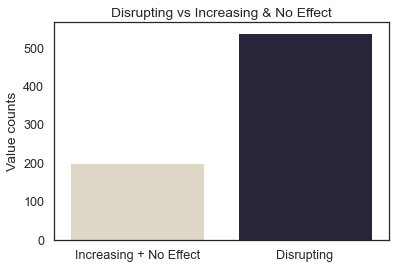

In [6]:
visualize_label_counts(predator.data_materials["train_data_processed"])
display_label_counts(predator.data_materials["train_data_processed"])

## Data Sampling with Unique Proteins

In [7]:
predator.sample_spsm()  # single protein single mutation

2022-06-15 21:36:42 | DEBUG    | Predator | sampling ..


  0%|          | 0/50 [00:00<?, ?it/s]

In [8]:
predator.data_materials.keys()

dict_keys(['train_data', 'train_data_processed', 'sampled_train_data_list'])

In [9]:
display_data(predator.data_materials["sampled_train_data_list"][0], head_row=5)

Data dimensions: (164, 62)


,Mutation_Effect_Label,UniProt_ID,Mutation,Interactor_UniProt_ID,Template_sequence_identity,Alignment_score,Interactor_template_sequence_identity,Interactor_alignment_score,Final_ddG,ProtBert_score,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,1,Q9BPZ3,F118A,P11940,1.0000,1.000000,1.0000,0.968750,1.219700,-0.092273,...,118.0,5.30636,3.79101,52.4675,52.4675,427.775,194.715,622.495,3.35293,3.35293
1,1,P01116,E37G,P50749,0.9277,0.931315,0.3553,0.172500,2.470580,0.999487,...,329.0,45.03130,44.51690,70.2449,70.2449,464.470,400.030,864.505,2.63614,3.21798
2,1,Q96QK1,Q586A,Q9UBQ0-2,1.0000,0.360743,1.0000,0.973118,1.697280,0.836538,...,453.0,68.21070,68.21080,59.2629,59.2629,510.690,298.820,809.510,2.93412,4.81473
3,1,O43521-3,G66A,P10415-2,1.0000,0.714286,0.6505,0.435452,0.945436,-0.082937,...,181.0,2.67195,2.73996,31.6189,31.6189,421.875,272.215,694.090,3.41921,3.20397
4,0,Q13418,Q362H,Q9NVD7,0.9925,0.971054,1.0000,0.961240,0.621791,0.206189,...,391.0,60.07690,60.06430,33.8017,33.8017,406.135,174.195,580.330,3.39874,3.39874


In [10]:
# Number of sampled train data
len(predator.data_materials["sampled_train_data_list"])

50

### Label Distributions in Training Data

MEDIANS: [59, 105]
MEDIANS: [59, 105]


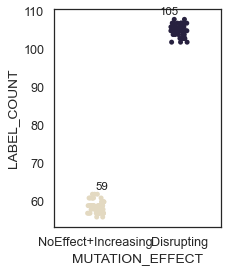

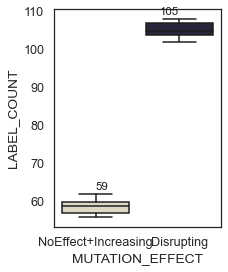

In [11]:
visualize_sampled_train_datasets_label_counts(predator.data_materials["sampled_train_data_list"], kind='strip')
visualize_sampled_train_datasets_label_counts(predator.data_materials["sampled_train_data_list"], kind='box')

MEDIANS: [59, 105]


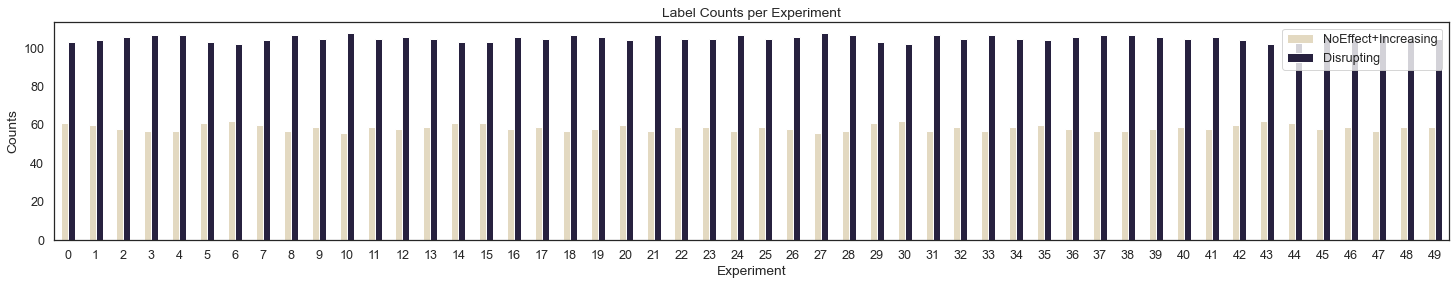

In [12]:
visualize_sampled_train_datasets_label_counts(predator.data_materials["sampled_train_data_list"], kind='bar')

## Preparing the Train Data Materials for Machine Learning Algorithms

In [13]:
predator.data_materials.keys()

dict_keys(['train_data', 'train_data_processed', 'sampled_train_data_list'])

In [14]:
predator.data_materials.prepare_model_data_materials()  # it will initialize Xs etc. too

2022-06-15 21:36:55 | DEBUG    | helpers.helpers_predator.data_materials | preparing datasets for ML ..
2022-06-15 21:36:55 | DEBUG    | helpers.helpers_predator.data_materials | Initializing model datasets ..


  0%|          | 0/50 [00:00<?, ?it/s]

2022-06-15 21:36:55 | DEBUG    | helpers.helpers_predator.data_materials | Appending data materials ..
2022-06-15 21:36:55 | DEBUG    | helpers.helpers_predator.data_materials | Appending data materials ..
2022-06-15 21:36:55 | DEBUG    | helpers.helpers_predator.data_materials | Appending data materials ..
2022-06-15 21:36:55 | DEBUG    | helpers.helpers_predator.data_materials | Appending data materials ..
2022-06-15 21:36:55 | DEBUG    | helpers.helpers_predator.data_materials | Appending data materials ..
2022-06-15 21:36:55 | DEBUG    | helpers.helpers_predator.data_materials | Appending data materials ..
2022-06-15 21:36:55 | DEBUG    | helpers.helpers_predator.data_materials | Appending data materials ..
2022-06-15 21:36:55 | DEBUG    | helpers.helpers_predator.data_materials | Appending data materials ..
2022-06-15 21:36:56 | DEBUG    | helpers.helpers_predator.data_materials | Appending data materials ..
2022-06-15 21:36:56 | DEBUG    | helpers.helpers_predator.data_materials 

In [15]:
print(len(predator.data_materials["Xs"]))
predator.data_materials["Xs"][0].head()

50


,Template_sequence_identity,Alignment_score,Interactor_template_sequence_identity,Interactor_alignment_score,Final_ddG,ProtBert_score,ProteinSolver_score,EL2_score,Model/DOPE_score,Provean_score,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,1.000000,0.948980,1.0000,0.306767,-0.38786,0.995137,0.594040,2.204959,-0.444294,-5.785,...,309.0,21.2713,20.8506,32.48860,32.48860,1159.70,952.745,2112.450,3.00752,4.27950
1,0.677800,0.664382,0.5222,0.517348,1.34736,0.389287,0.276097,2.264306,-1.820240,-5.819,...,188.0,26.6920,26.6217,17.20170,17.20170,667.92,288.795,956.720,3.51062,3.45116
2,0.333300,0.288192,0.9507,0.943866,1.76213,0.982242,0.020935,2.364912,0.177327,-10.467,...,409.0,399.4770,399.6150,49.65870,49.65870,0.00,0.000,0.000,3.39677,3.57761
3,0.683200,0.629376,1.0000,0.508475,4.30466,0.987585,0.907073,1.488382,-0.624092,-5.311,...,292.0,80.0940,80.8401,2.20488,2.20488,367.49,187.965,555.455,4.53101,4.05405
4,0.991667,0.892083,1.0000,0.891262,1.16345,0.994134,0.010976,2.027475,-0.421525,-5.741,...,222.0,22.6326,22.5082,32.91710,32.91710,1167.28,460.855,1628.150,5.08779,5.08779


## Initial Insights

For each experiment, the models are fitted with 80% of training data and predictions are made for the remaining 20%. Then performance is evaluated comparing predictions with groundtruth labels.

In [16]:
predator.run_evaluate_valid(models_type='default')

2022-06-15 21:37:01 | DEBUG    | helpers.helpers_predator.evaluation | Training on train set and measuring performance by predicting on validation set.
2022-06-15 21:37:01 | DEBUG    | helpers.helpers_predator.evaluation | Evaluating with default models.


  0%|          | 0/50 [00:00<?, ?it/s]

-------- EXPERIMENT:  1 --------
X_train.shape=(131, 58), y_train.shape=(131,), X_valid.shape=(33, 58), y_valid.shape=(33,)
Classifier: RandomForestClassifier(random_state=42)
Accuracy score		: 0.6970
Balanced accuracy score : 0.6190
-------- EXPERIMENT:  2 --------
X_train.shape=(131, 58), y_train.shape=(131,), X_valid.shape=(33, 58), y_valid.shape=(33,)
Classifier: RandomForestClassifier(random_state=42)
Accuracy score		: 0.5758
Balanced accuracy score : 0.5238
-------- EXPERIMENT:  3 --------
X_train.shape=(131, 58), y_train.shape=(131,), X_valid.shape=(33, 58), y_valid.shape=(33,)
Classifier: RandomForestClassifier(random_state=42)
Accuracy score		: 0.7879
Balanced accuracy score : 0.7440
-------- EXPERIMENT:  4 --------
X_train.shape=(131, 58), y_train.shape=(131,), X_valid.shape=(33, 58), y_valid.shape=(33,)
Classifier: RandomForestClassifier(random_state=42)
Accuracy score		: 0.6667
Balanced accuracy score : 0.5682
-------- EXPERIMENT:  5 --------
X_train.shape=(131, 58), y_trai

In [17]:
from helpers.helpers_predator.visualizers import visualize_accuracy_metrics

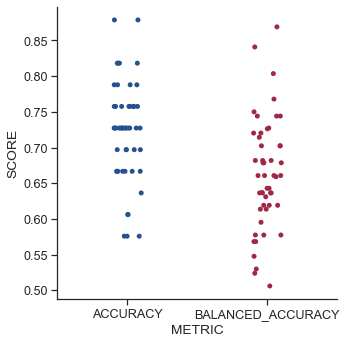

In [18]:
visualize_accuracy_metrics(
    predator.eval_valid.scores["initial_scoring"]["acc_scores"],
    predator.eval_valid.scores["initial_scoring"]["balan_acc_scores"],
    kind='strip'
)

## SHAP Feature Importance Ranking

In [19]:
shap_top_ns = [5, 10, 20, 30, 40]

In [20]:
predator.init_shap_feature_selector(shap_top_ns)

2022-06-15 21:37:16 | DEBUG    | helpers.helpers_predator.feature_selection | Initializing ShapFeatureSelector ..


2022-06-15 21:37:16 | DEBUG    | helpers.helpers_predator.feature_selection | Loading ShapFeatureSelector ..


  0%|          | 0/50 [00:00<?, ?it/s]

 === SELECTED FEATURES === 
 --- SHAP TOP 5 ---
Experiment 1
['EL2_score', 'Final_ddG', 'van_der_waals_mut', 'Provean_score', 'Interactor_template_sequence_identity']

Experiment 2
['Final_ddG', 'entropy_sidechain_wt', 'Provean_score', 'Solvent_accessibility_mut', 'van_der_waals_mut']

Experiment 3
['EL2_score', 'Provean_score', 'Solvent_accessibility_wt', 'Final_ddG', 'ProteinSolver_score']

Experiment 4
['Provean_score', 'EL2_score', 'Final_ddG', 'Matrix_score', 'Solvent_accessibility_mut']

Experiment 5
['Provean_score', 'Final_ddG', 'Matrix_score', 'EL2_score', 'van_der_waals_mut']

Experiment 6
['Provean_score', 'EL2_score', 'Final_ddG', 'Matrix_score', 'entropy_sidechain_mut']

Experiment 7
['Final_ddG', 'EL2_score', 'Provean_score', 'Matrix_score', 'sidechain_hbond_mut']

Experiment 8
['Provean_score', 'EL2_score', 'Solvent_accessibility_wt', 'Interactor_alignment_score', 'Interface_contact_distance_wt']

Experiment 9
['Provean_score', 'EL2_score', 'Interactor_alignment_score', 

## Aggregated Feature Selection

In [21]:
predator.aggregate_selected_features('occurrence')

2022-06-15 21:37:29 | DEBUG    | helpers.helpers_predator.data_materials | Initialize feature selected data materials [n_top=5]..
2022-06-15 21:37:30 | DEBUG    | helpers.helpers_predator.data_materials | Initialize feature selected data materials [n_top=10]..
2022-06-15 21:37:30 | DEBUG    | helpers.helpers_predator.data_materials | Initialize feature selected data materials [n_top=20]..
2022-06-15 21:37:30 | DEBUG    | helpers.helpers_predator.data_materials | Initialize feature selected data materials [n_top=30]..
2022-06-15 21:37:30 | DEBUG    | helpers.helpers_predator.data_materials | Initialize feature selected data materials [n_top=40]..


In [22]:
predator.shap_feature_selector.aggregated_feature_selector.n_features_to_selected_features_occurrences_counts

defaultdict(dict,
            {5: defaultdict(int,
                         {'EL2_score': 49,
                          'Final_ddG': 43,
                          'van_der_waals_mut': 9,
                          'Provean_score': 50,
                          'Interactor_template_sequence_identity': 6,
                          'entropy_sidechain_wt': 2,
                          'Solvent_accessibility_mut': 12,
                          'Solvent_accessibility_wt': 11,
                          'ProteinSolver_score': 5,
                          'Matrix_score': 20,
                          'entropy_sidechain_mut': 1,
                          'sidechain_hbond_mut': 1,
                          'Interactor_alignment_score': 23,
                          'Interface_contact_distance_wt': 2,
                          'pcv_vdW_self_wt': 1,
                          'solvation_polar_mut': 5,
                          'solvation_polar_wt': 2,
                          'ProtBert_score': 1,
  

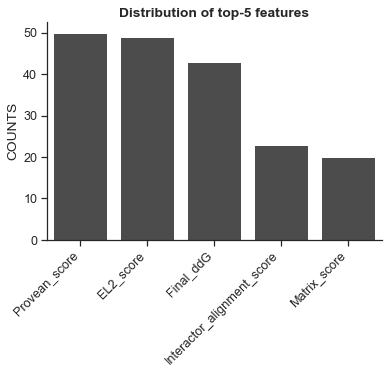

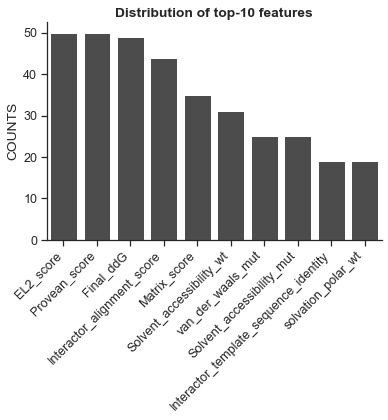

In [23]:
from helpers.helpers_predator.visualizers import visualize_distribution_top_n_features

visualize_distribution_top_n_features(predator.shap_feature_selector, 5)
visualize_distribution_top_n_features(predator.shap_feature_selector, 10)  # available for each shap_top_ns.

In [24]:
predator.shap_feature_selector.n_features_to_aggregated_features[10]

['EL2_score',
 'Provean_score',
 'Final_ddG',
 'Interactor_alignment_score',
 'Matrix_score',
 'Solvent_accessibility_wt',
 'van_der_waals_mut',
 'Solvent_accessibility_mut',
 'Interactor_template_sequence_identity',
 'solvation_polar_wt']

In [25]:
predator.shap_feature_selector.display_rankings(10, extract=False)

2022-06-15 21:37:32 | DEBUG    | helpers.helpers_predator.feature_selection | Displaying rankings ..


,0,1,2,3,4,5,6,7,8,9
0,EL2_score,Final_ddG,van_der_waals_mut,Provean_score,Interactor_template_sequence_identity,Interactor_alignment_score,solvation_polar_mut,entropy_mainchain_mut,Solvent_accessibility_wt,Matrix_score
1,Final_ddG,entropy_sidechain_wt,Provean_score,Solvent_accessibility_mut,van_der_waals_mut,Interactor_alignment_score,EL2_score,Solvent_accessibility_wt,electrostatic_kon_mut,Interface_contact_distance_mut
2,EL2_score,Provean_score,Solvent_accessibility_wt,Final_ddG,ProteinSolver_score,Interface_contact_distance_wt,Solvent_accessibility_mut,Matrix_score,solvation_polar_mut,entropy_sidechain_wt
3,Provean_score,EL2_score,Final_ddG,Matrix_score,Solvent_accessibility_mut,Solvent_accessibility_wt,ProteinSolver_score,solvation_polar_wt,Interactor_alignment_score,sidechain_hbond_wt
4,Provean_score,Final_ddG,Matrix_score,EL2_score,van_der_waals_mut,sidechain_hbond_mut,Interactor_alignment_score,pcv_vdW_wt,sidechain_hbond_wt,solvation_polar_wt


In [26]:
predator.shap_feature_selector.n_features_to_aggregated_features

{5: ['Provean_score',
  'EL2_score',
  'Final_ddG',
  'Interactor_alignment_score',
  'Matrix_score'],
 10: ['EL2_score',
  'Provean_score',
  'Final_ddG',
  'Interactor_alignment_score',
  'Matrix_score',
  'Solvent_accessibility_wt',
  'van_der_waals_mut',
  'Solvent_accessibility_mut',
  'Interactor_template_sequence_identity',
  'solvation_polar_wt'],
 20: ['EL2_score',
  'Final_ddG',
  'Provean_score',
  'Interactor_alignment_score',
  'Solvent_accessibility_wt',
  'van_der_waals_mut',
  'Matrix_score',
  'Solvent_accessibility_mut',
  'Interactor_template_sequence_identity',
  'entropy_sidechain_mut',
  'solvation_polar_mut',
  'solvation_polar_wt',
  'Interface_contact_distance_wt',
  'ProtBert_score',
  'entropy_mainchain_wt',
  'Model/DOPE_score',
  'Interface_contact_distance_mut',
  'ProteinSolver_score',
  'entropy_sidechain_wt',
  'sidechain_hbond_mut'],
 30: ['EL2_score',
  'Final_ddG',
  'Provean_score',
  'Interactor_alignment_score',
  'van_der_waals_mut',
  'Solvent_a

In [27]:
predator.shap_feature_selector.n_features_to_aggregated_features[10]

['EL2_score',
 'Provean_score',
 'Final_ddG',
 'Interactor_alignment_score',
 'Matrix_score',
 'Solvent_accessibility_wt',
 'van_der_waals_mut',
 'Solvent_accessibility_mut',
 'Interactor_template_sequence_identity',
 'solvation_polar_wt']

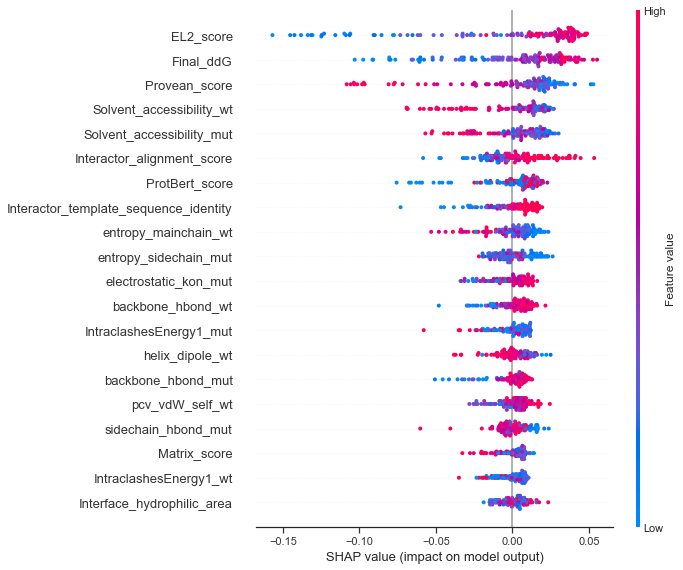

In [28]:
import shap

shap.summary_plot(
    predator.shap_feature_selector.shap_values_train_list[38][1],
    predator.data_materials["Xs_train"][38]
)

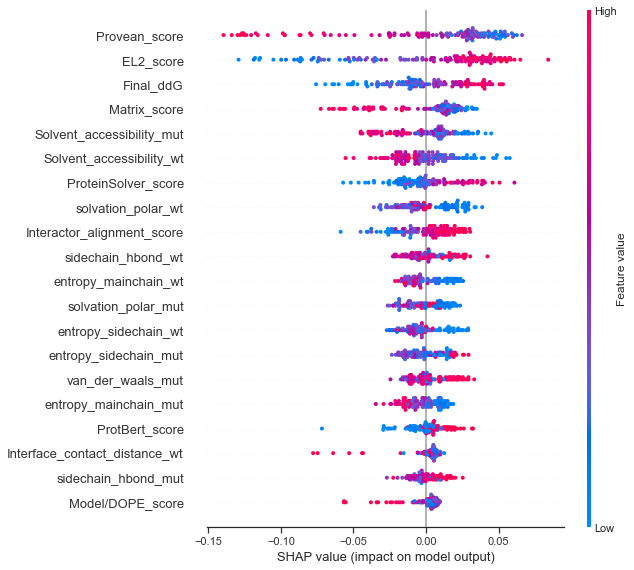

In [29]:
shap.summary_plot(
    predator.shap_feature_selector.shap_values_train_list[3][1],
    predator.data_materials["Xs_train"][3]
)

## Evaluation Metrics

In [30]:
predator.initialize_evaluation_metrics()

2022-06-15 21:37:59 | INFO     | helpers.helpers_predator.evaluation | Initializing EvaluationMetrics..
2022-06-15 21:37:59 | INFO     | helpers.helpers_predator.evaluation | Initialize_benchmark_dataframes ..


<div class="alert alert-block" style="background-color: white; border: 2px solid; padding: 10px; border-color: #F57C00">
    <b style="color: #F57C00"><i class="fa fa-warning" aria-hidden="true"></i>&nbsp; Warning</b><br>
<div>
    
Evaluation will take a long time. ~5 hrs on notebook

In [ ]:
predator_log("Running the evaluation ..")

In [31]:
# ignore and run the next cell if you really want to run
# raise

RuntimeError: No active exception to reraise

In [32]:
predator.eval_metrics.run_eval_metrics(
    n_repeats=5,
    n_jobs=N_CORES,
    verbose=True
)

2022-06-15 21:38:04 | INFO     | helpers.helpers_predator.evaluation | Running evaluation metrics ..


  0%|          | 0/50 [00:00<?, ?it/s]


EVALUATION METRIC: F1
------------------------------------
X_train_exp_0_provean       : 0.7377
X_train_exp_0_ddG           : 0.61
X_train_exp_0               : 0.774
X_train_exp_0_shap_5        : 0.7771
X_train_exp_0_shap_10       : 0.803
X_train_exp_0_shap_20       : 0.7962
X_train_exp_0_shap_30       : 0.7981
X_train_exp_0_shap_40       : 0.7896

EVALUATION METRIC: BALANCED_ACCURACY
------------------------------------
X_train_exp_0_provean       : 0.6683
X_train_exp_0_ddG           : 0.4944
X_train_exp_0               : 0.6564
X_train_exp_0_shap_5        : 0.6927
X_train_exp_0_shap_10       : 0.6934
X_train_exp_0_shap_20       : 0.6962
X_train_exp_0_shap_30       : 0.6692
X_train_exp_0_shap_40       : 0.6656

EVALUATION METRIC: ACCURACY
------------------------------------
X_train_exp_0_provean       : 0.6668
X_train_exp_0_ddG           : 0.5396
X_train_exp_0               : 0.6927
X_train_exp_0_shap_5        : 0.7389
X_train_exp_0_shap_10       : 0.7432
X_train_exp_0_shap_20     

In [33]:
predator.eval_metrics.scoring_metrics_data

,Provean,$\Delta\Delta$G,All Columns,SHAP Columns (5),SHAP Columns (10),SHAP Columns (20),SHAP Columns (30),SHAP Columns (40)
METRIC,,,,,,,,
ACCURACY,0.621396,0.582794,0.718186,0.718248,0.733790,0.733018,0.730140,0.726856
BALANCED_ACCURACY,0.597916,0.551764,0.658556,0.673020,0.690744,0.683184,0.677386,0.668126
F1,0.697000,0.665246,0.798404,0.788120,0.802778,0.804440,0.803270,0.801348
F1_MACRO,0.585278,0.540268,0.653624,0.667366,0.686020,0.679512,0.670796,0.666882
F1_MICRO,0.620894,0.584780,0.719080,0.718500,0.736040,0.735270,0.728198,0.726612
MCC,0.199666,0.105636,0.363190,0.370278,0.409616,0.407112,0.388386,0.379116
PRECISION,0.716972,0.682258,0.741760,0.760742,0.770734,0.762214,0.756280,0.752060
PRECISION_MACRO,0.600654,0.553166,0.708322,0.706194,0.724768,0.728716,0.721222,0.717436
PRECISION_MICRO,0.621334,0.585382,0.717094,0.716728,0.734916,0.733966,0.730330,0.726398


In [35]:
print(predator.eval_metrics.scoring_metrics_data.to_markdown())

| METRIC            |   Provean |   $\Delta\Delta$G |   All Columns |   SHAP Columns (5) |   SHAP Columns (10) |   SHAP Columns (20) |   SHAP Columns (30) |   SHAP Columns (40) |
|:------------------|----------:|------------------:|--------------:|-------------------:|--------------------:|--------------------:|--------------------:|--------------------:|
| ACCURACY          |  0.621396 |          0.582794 |      0.718186 |           0.718248 |            0.73379  |            0.733018 |            0.73014  |            0.726856 |
| BALANCED_ACCURACY |  0.597916 |          0.551764 |      0.658556 |           0.67302  |            0.690744 |            0.683184 |            0.677386 |            0.668126 |
| F1                |  0.697    |          0.665246 |      0.798404 |           0.78812  |            0.802778 |            0.80444  |            0.80327  |            0.801348 |
| F1_MACRO          |  0.585278 |          0.540268 |      0.653624 |           0.667366 |            0.6

| METRIC            |   Provean |   $\Delta\Delta$G |   All Columns |   SHAP Columns (5) |   SHAP Columns (10) |   SHAP Columns (20) |   SHAP Columns (30) |   SHAP Columns (40) |
|:------------------|----------:|------------------:|--------------:|-------------------:|--------------------:|--------------------:|--------------------:|--------------------:|
| ACCURACY          |  0.621396 |          0.582794 |      0.718186 |           0.718248 |            0.73379  |            0.733018 |            0.73014  |            0.726856 |
| BALANCED_ACCURACY |  0.597916 |          0.551764 |      0.658556 |           0.67302  |            0.690744 |            0.683184 |            0.677386 |            0.668126 |
| F1                |  0.697    |          0.665246 |      0.798404 |           0.78812  |            0.802778 |            0.80444  |            0.80327  |            0.801348 |
| F1_MACRO          |  0.585278 |          0.540268 |      0.653624 |           0.667366 |            0.68602  |            0.679512 |            0.670796 |            0.666882 |
| F1_MICRO          |  0.620894 |          0.58478  |      0.71908  |           0.7185   |            0.73604  |            0.73527  |            0.728198 |            0.726612 |
| MCC               |  0.199666 |          0.105636 |      0.36319  |           0.370278 |            0.409616 |            0.407112 |            0.388386 |            0.379116 |
| PRECISION         |  0.716972 |          0.682258 |      0.74176  |           0.760742 |            0.770734 |            0.762214 |            0.75628  |            0.75206  |
| PRECISION_MACRO   |  0.600654 |          0.553166 |      0.708322 |           0.706194 |            0.724768 |            0.728716 |            0.721222 |            0.717436 |
| PRECISION_MICRO   |  0.621334 |          0.585382 |      0.717094 |           0.716728 |            0.734916 |            0.733966 |            0.73033  |            0.726398 |
| RECALL            |  0.68789  |          0.670526 |      0.87483  |           0.832718 |            0.84764  |            0.86244  |            0.86665  |            0.870454 |
| ROC_AUC           |  0.665212 |          0.61042  |      0.733858 |           0.751902 |            0.77739  |            0.770846 |            0.765084 |            0.753628 |

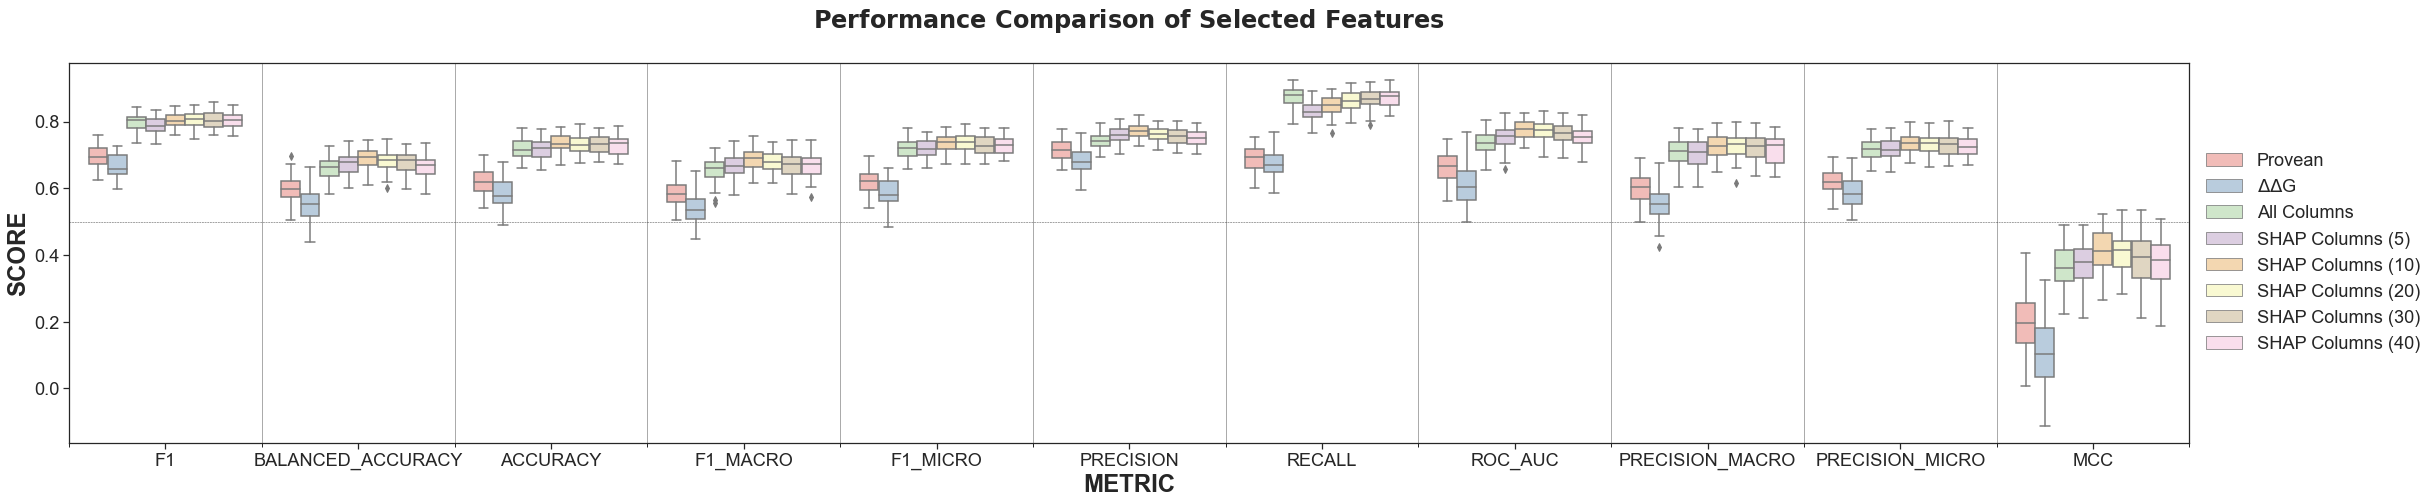

In [37]:
predator.eval_metrics.plot_performance_comparison_results()

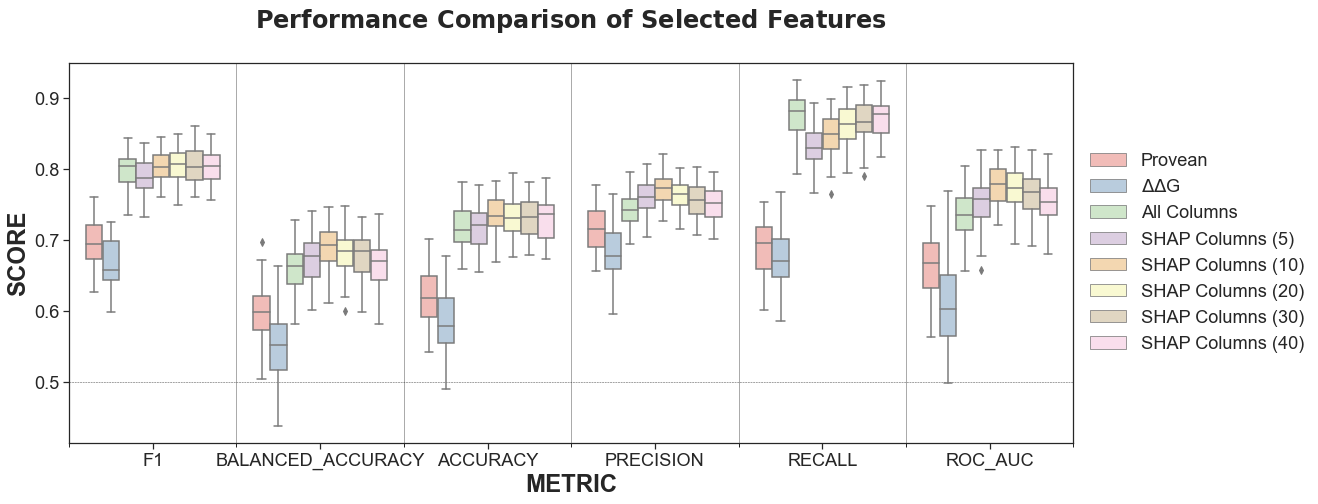

In [38]:
metrics = ["F1", "BALANCED_ACCURACY", "ACCURACY", "PRECISION", "RECALL", "ROC_AUC"]
predator.eval_metrics.plot_performance_comparison_results(metrics)

## Fine Tuning

Fine Tuning on 80% of data (training *set*)

In [39]:
determined_feature_set = "shap_10"
predator.set_determined_feature_set(determined_feature_set)

2022-06-16 10:14:32 | DEBUG    | Predator | Setting determined feature set to `shap_10`.
2022-06-16 10:14:32 | DEBUG    | Predator | Setting determined features to 
['EL2_score', 'Provean_score', 'Final_ddG', 'Interactor_alignment_score', 'Matrix_score', 'Solvent_accessibility_wt', 'van_der_waals_mut', 'Solvent_accessibility_mut', 'Interactor_template_sequence_identity', 'solvation_polar_wt'].


In [ ]:
predator_log("Running hyperparameter tuning ..")

In [40]:
predator.run_hyperparameter_search(
    n_iter=100,
    n_repeats_cv=3,
    n_jobs=N_CORES,
    verbose=0,
    search_type="randomized",
    param_grid_level=1
)

2022-06-16 10:28:33 | DEBUG    | helpers.helpers_predator.fine_tuning | Running randomized search for each experiment ..
2022-06-16 10:28:33 | DEBUG    | helpers.helpers_predator.fine_tuning | PARAM_GRID: {'bootstrap': [True, False], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, None], 'min_samples_leaf': [1, 2, 4], 'n_estimators': [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500, 520, 540, 560, 580, 600], 'min_samples_split': [2, 5], 'max_features': ['auto', 'sqrt', None], 'class_weight': ['balanced', None]}


  0%|          | 0/50 [00:00<?, ?it/s]

In [41]:
predator.fine_tuner.classifiers_attributes_data.head()

,best_params_,best_estimator_,best_score_
EXP_1,"{'n_estimators': 5, 'min_samples_split': 2, 'm...","(DecisionTreeClassifier(max_depth=3, max_featu...",0.727778
EXP_2,"{'n_estimators': 20, 'min_samples_split': 5, '...","(DecisionTreeClassifier(max_depth=8, max_featu...",0.674861
EXP_3,"{'n_estimators': 380, 'min_samples_split': 5, ...","(DecisionTreeClassifier(max_depth=7, max_featu...",0.748287
EXP_4,"{'n_estimators': 90, 'min_samples_split': 5, '...","(DecisionTreeClassifier(max_depth=2, max_featu...",0.738333
EXP_5,"{'n_estimators': 180, 'min_samples_split': 2, ...","(DecisionTreeClassifier(max_depth=3, max_featu...",0.720509


In [42]:
predator.fine_tuner.best_estimators[:5]

[RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=3,
                        max_features='sqrt', min_samples_leaf=2, n_estimators=5,
                        random_state=83811),
 RandomForestClassifier(class_weight='balanced', max_depth=8, min_samples_leaf=4,
                        min_samples_split=5, n_estimators=20,
                        random_state=14593),
 RandomForestClassifier(max_depth=7, min_samples_leaf=4, min_samples_split=5,
                        n_estimators=380, random_state=3279),
 RandomForestClassifier(class_weight='balanced', max_depth=2, min_samples_leaf=2,
                        min_samples_split=5, n_estimators=90,
                        random_state=97197),
 RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=3,
                        max_features='sqrt', min_samples_leaf=4,
                        n_estimators=180, random_state=36049)]

In [43]:
len(predator.tuned_models)

50

In [44]:
predator.tuned_models[:5]

[RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=3,
                        max_features='sqrt', min_samples_leaf=2, n_estimators=5,
                        random_state=83811),
 RandomForestClassifier(class_weight='balanced', max_depth=8, min_samples_leaf=4,
                        min_samples_split=5, n_estimators=20,
                        random_state=14593),
 RandomForestClassifier(max_depth=7, min_samples_leaf=4, min_samples_split=5,
                        n_estimators=380, random_state=3279),
 RandomForestClassifier(class_weight='balanced', max_depth=2, min_samples_leaf=2,
                        min_samples_split=5, n_estimators=90,
                        random_state=97197),
 RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=3,
                        max_features='sqrt', min_samples_leaf=4,
                        n_estimators=180, random_state=36049)]

In [45]:
predator.fine_tuner.best_estimators[:5] == predator.tuned_models[:5]

True

In [46]:
predator.default_models[0]

RandomForestClassifier(random_state=42)

In [47]:
len(predator.tuned_models)

50

In [48]:
predator.tuned_models[0]

RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=3,
                       max_features='sqrt', min_samples_leaf=2, n_estimators=5,
                       random_state=83811)

In [49]:
predator.tuned_models[1]

RandomForestClassifier(class_weight='balanced', max_depth=8, min_samples_leaf=4,
                       min_samples_split=5, n_estimators=20,
                       random_state=14593)

## Performance of Tuned Models on (out of sample) Validation Data

For each experiment, the **hyper-tuned** models are fitted with 80% of training data and predictions are made for the remaining 20%. Then performance is evaluated comparing predictions with groundtruth labels.

In [50]:
predator.run_evaluate_valid(models_type='feature_selected')

2022-06-16 16:59:05 | DEBUG    | helpers.helpers_predator.evaluation | Training on train set and measuring performance by predicting on validation set.
2022-06-16 16:59:05 | DEBUG    | helpers.helpers_predator.evaluation | Evaluating with default models using determined features.
2022-06-16 16:59:05 | DEBUG    | helpers.helpers_predator.evaluation | Determined features: 
['EL2_score', 'Provean_score', 'Final_ddG', 'Interactor_alignment_score', 'Matrix_score', 'Solvent_accessibility_wt', 'van_der_waals_mut', 'Solvent_accessibility_mut', 'Interactor_template_sequence_identity', 'solvation_polar_wt']


  0%|          | 0/50 [00:00<?, ?it/s]

-------- EXPERIMENT:  1 --------
X_train.shape=(131, 10), y_train.shape=(131,), X_valid.shape=(33, 10), y_valid.shape=(33,)
Classifier: RandomForestClassifier(random_state=42)
Accuracy score		: 0.7576
Balanced accuracy score : 0.7202
-------- EXPERIMENT:  2 --------
X_train.shape=(131, 10), y_train.shape=(131,), X_valid.shape=(33, 10), y_valid.shape=(33,)
Classifier: RandomForestClassifier(random_state=42)
Accuracy score		: 0.6364
Balanced accuracy score : 0.5714
-------- EXPERIMENT:  3 --------
X_train.shape=(131, 10), y_train.shape=(131,), X_valid.shape=(33, 10), y_valid.shape=(33,)
Classifier: RandomForestClassifier(random_state=42)
Accuracy score		: 0.8182
Balanced accuracy score : 0.7857
-------- EXPERIMENT:  4 --------
X_train.shape=(131, 10), y_train.shape=(131,), X_valid.shape=(33, 10), y_valid.shape=(33,)
Classifier: RandomForestClassifier(random_state=42)
Accuracy score		: 0.6970
Balanced accuracy score : 0.6136
-------- EXPERIMENT:  5 --------
X_train.shape=(131, 10), y_trai

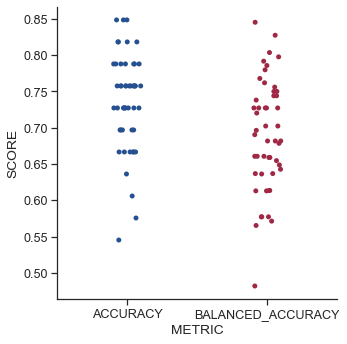

In [51]:
visualize_accuracy_metrics(
    predator.eval_valid.scores["feature_selected_scoring"]["acc_scores"], 
    predator.eval_valid.scores["feature_selected_scoring"]["balan_acc_scores"],
    kind='strip'
)

In [52]:
predator.run_evaluate_valid(models_type='tuned')

2022-06-16 16:59:37 | DEBUG    | helpers.helpers_predator.evaluation | Training on train set and measuring performance by predicting on validation set.
2022-06-16 16:59:37 | DEBUG    | helpers.helpers_predator.evaluation | Evaluating with tuned models.
2022-06-16 16:59:37 | DEBUG    | helpers.helpers_predator.evaluation | Determined features: 
['EL2_score', 'Provean_score', 'Final_ddG', 'Interactor_alignment_score', 'Matrix_score', 'Solvent_accessibility_wt', 'van_der_waals_mut', 'Solvent_accessibility_mut', 'Interactor_template_sequence_identity', 'solvation_polar_wt']


  0%|          | 0/50 [00:00<?, ?it/s]

-------- EXPERIMENT:  1 --------
X_train.shape=(131, 10), y_train.shape=(131,), X_valid.shape=(33, 10), y_valid.shape=(33,)
Classifier: RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=3,
                       max_features='sqrt', min_samples_leaf=2, n_estimators=5,
                       random_state=83811)
Accuracy score		: 0.6364
Balanced accuracy score : 0.6250
-------- EXPERIMENT:  2 --------
X_train.shape=(131, 10), y_train.shape=(131,), X_valid.shape=(33, 10), y_valid.shape=(33,)
Classifier: RandomForestClassifier(class_weight='balanced', max_depth=8, min_samples_leaf=4,
                       min_samples_split=5, n_estimators=20,
                       random_state=14593)
Accuracy score		: 0.6364
Balanced accuracy score : 0.6250
-------- EXPERIMENT:  3 --------
X_train.shape=(131, 10), y_train.shape=(131,), X_valid.shape=(33, 10), y_valid.shape=(33,)
Classifier: RandomForestClassifier(max_depth=7, min_samples_leaf=4, min_samples_split=5,
             

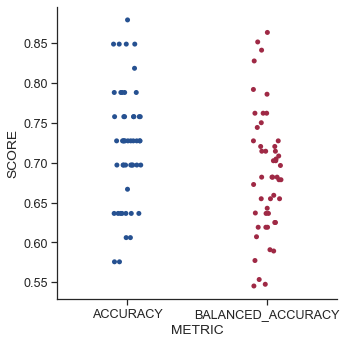

In [53]:
visualize_accuracy_metrics(
    predator.eval_valid.scores["finalized_scoring"]["acc_scores"], 
    predator.eval_valid.scores["finalized_scoring"]["balan_acc_scores"],
    kind='strip'
)

,Experiment,Acc_scores,Balan_acc_scores,Models_type
0,0,0.636364,0.625000,Tuned+FeatureSelected
1,1,0.636364,0.625000,Tuned+FeatureSelected
2,2,0.787879,0.744048,Tuned+FeatureSelected
3,3,0.727273,0.659091,Tuned+FeatureSelected
4,4,0.575758,0.545455,Tuned+FeatureSelected
5,5,0.636364,0.589286,Tuned+FeatureSelected
6,6,0.727273,0.714286,Tuned+FeatureSelected
7,7,0.606061,0.619048,Tuned+FeatureSelected
8,8,0.848485,0.840909,Tuned+FeatureSelected
9,9,0.787879,0.761905,Tuned+FeatureSelected


       Experiment  Acc_scores  Balan_acc_scores
count    50.00000   50.000000         50.000000
mean     24.50000    0.721818          0.686861
std      14.57738    0.072616          0.076271
min       0.00000    0.575758          0.545455
25%      12.25000    0.696970          0.636364
50%      24.50000    0.727273          0.681818
75%      36.75000    0.757576          0.725514
max      49.00000    0.878788          0.863095
2022-06-16 17:00:16 | INFO     | helpers.helpers_predator.evaluation | balanced_acc_threshold: 0.6363636363636364
2022-06-16 17:00:16 | INFO     | helpers.helpers_predator.evaluation | bad_models_ix: [0, 1, 4, 5, 7, 12, 13, 21, 26, 30, 34, 39]
2022-06-16 17:00:16 | INFO     | helpers.helpers_predator.evaluation | qualified_models_ix: [2, 3, 6, 8, 9, 10, 11, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 27, 28, 29, 31, 32, 33, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
                                 Number of Model
Default                            

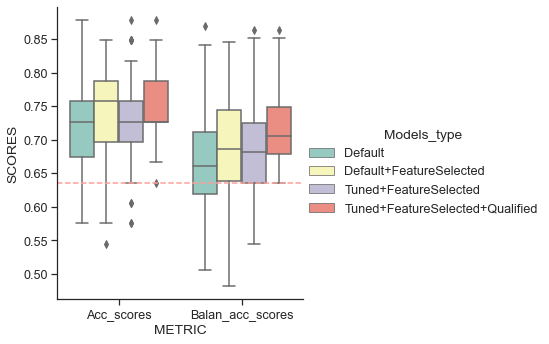

In [54]:
predator.compare_tuned_models(kind='box')

In [55]:
predator.eval_valid.comparison_data

Models_type,Default,Default+FeatureSelected,Tuned+FeatureSelected,Tuned+FeatureSelected+Qualified
Acc_scores,0.723636,0.736364,0.721818,0.750399
Balan_acc_scores,0.662327,0.689535,0.686861,0.716436


In [57]:
from pprint import pprint

print(len(predator.default_models))
pprint(predator.default_models[:3])
print(' - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  ')
print(len(predator.tuned_models))
pprint(predator.tuned_models[:3])
print(' - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  ')
print(len(predator.qualified_models))
pprint(predator.qualified_models[:3])

50
[RandomForestClassifier(random_state=42),
 RandomForestClassifier(random_state=42),
 RandomForestClassifier(random_state=42)]
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  
50
[RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=3,
                       max_features='sqrt', min_samples_leaf=2, n_estimators=5,
                       random_state=83811),
 RandomForestClassifier(class_weight='balanced', max_depth=8, min_samples_leaf=4,
                       min_samples_split=5, n_estimators=20,
                       random_state=14593),
 RandomForestClassifier(max_depth=7, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=380, random_state=3279)]
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  
38
[RandomForestClassifier(max_depth=7, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=380, random_state=3279),
 RandomForestClassifier(cla

In [58]:
print(len(predator.qualified_models))
predator.qualified_models == predator.eval_valid.qualified_models

38


True

## Fit Finalized Models

For each experiment, the **hyper-tuned** models are fitted with **all of training** data. These models then will be used to make prediction on TCGA Cancer Datasets.

In [59]:
predator.fit_finalized_models()

2022-06-16 17:05:12 | DEBUG    | Predator | Fitting finalized models with all training data ..
2022-06-16 17:05:12 | INFO     | Predator | Model elimination: True
2022-06-16 17:05:12 | INFO     | Predator | Using 38 qualified models as finalized models.


  0%|          | 0/38 [00:00<?, ?it/s]

In [60]:
print(predator.n_experiment)
print(predator.n_models)

50
38


In [61]:
predator.data_materials.keys()

dict_keys(['train_data', 'train_data_processed', 'sampled_train_data_list', 'prepared_dataframes', 'label_proportions_dataframes', 'Xs', 'ys', 'Xs_train', 'ys_train', 'Xs_valid', 'ys_valid', 'Xs_train_random', 'ys_train_random', 'Xs_valid_random', 'ys_valid_random', 'Xs_shap_5', 'Xs_train_shap_5', 'Xs_valid_shap_5', 'Xs_provean', 'Xs_train_provean', 'Xs_ddG', 'Xs_train_ddG', 'Xs_shap_10', 'Xs_train_shap_10', 'Xs_valid_shap_10', 'Xs_shap_20', 'Xs_train_shap_20', 'Xs_valid_shap_20', 'Xs_shap_30', 'Xs_train_shap_30', 'Xs_valid_shap_30', 'Xs_shap_40', 'Xs_train_shap_40', 'Xs_valid_shap_40'])

## Exporting Model

In [86]:
from helpers.helpers_predator.common import export_serialized_predator

In [87]:
export_serialized_predator(predator)

2022-06-16 23:47:03 | DEBUG    | helpers.helpers_predator.common | Folder with ID cc84a54e is created.
2022-06-16 23:47:03 | DEBUG    | helpers.helpers_predator.common | Exporting Predator at location PredatorModels in folder PredatorModel_2022-06-16\cc84a54e..
2022-06-16 23:47:04 | INFO     | helpers.helpers_predator.common | Predator object PredatorModels\PredatorModel_2022-06-16\cc84a54e\predator.pkl is exported.
2022-06-16 23:47:04 | INFO     | helpers.helpers_predator.common | Config is exported.


## Loading the model

In [88]:
from helpers.helpers_predator.common import (
    load_predator, unzip_predator, compare_predator_objects
)

In [90]:
# Extracted model
PREDATOR_PATH = "PredatorModels/PredatorModel_2022-06-16/cc84a54e/predator.pkl"
PREDATOR_ZIP_PATH = "PredatorModels/PredatorModel_2022-06-16/cc84a54e/predator.zip"

In [ ]:
unzip_predator(PREDATOR_ZIP_PATH)

In [91]:
predator_loaded = load_predator(PREDATOR_PATH)

2022-06-16 23:47:20 | INFO     | helpers.helpers_predator.common | Predator object PredatorModels/PredatorModel_2022-06-16/cc84a54e/predator.pkl is loaded successfully.


In [92]:
compare_predator_objects(predator, predator_loaded)

2022-06-16 23:47:20 | DEBUG    | helpers.helpers_predator.common | Checking attribute n_experiment ..
2022-06-16 23:47:20 | DEBUG    | helpers.helpers_predator.common | Checking attribute n_models ..
2022-06-16 23:47:20 | DEBUG    | helpers.helpers_predator.common | Checking attribute random_seeds ..
2022-06-16 23:47:20 | DEBUG    | helpers.helpers_predator.common | Checking attribute paths ..
2022-06-16 23:47:20 | DEBUG    | helpers.helpers_predator.common | Checking attribute tcga_cohorts ..
2022-06-16 23:47:20 | DEBUG    | helpers.helpers_predator.common | Checking attribute data_materials ..
2022-06-16 23:47:21 | DEBUG    | helpers.helpers_predator.common | Checking attribute default_models ..
2022-06-16 23:47:21 | DEBUG    | helpers.helpers_predator.common | Checking attribute tuned_models ..
2022-06-16 23:47:21 | DEBUG    | helpers.helpers_predator.common | Checking attribute finalized_models ..
2022-06-16 23:47:21 | DEBUG    | helpers.helpers_predator.common | Checking attribute

---

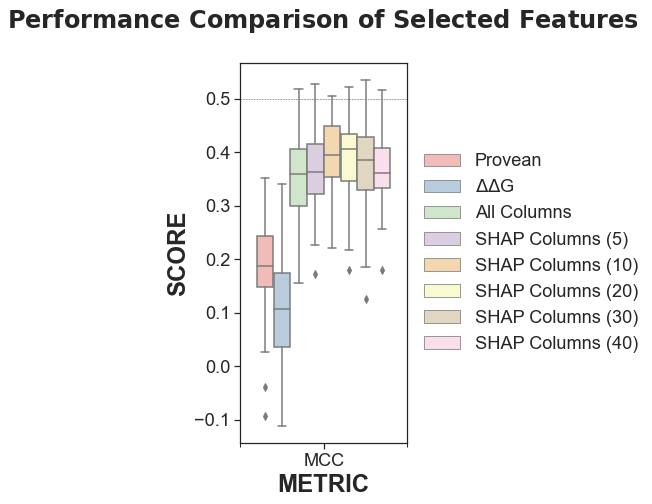

In [77]:
predator.eval_metrics.plot_performance_comparison_results(["MCC"])

In [69]:
predator.data_materials.keys()

dict_keys(['train_data', 'train_data_processed', 'sampled_train_data_list', 'prepared_dataframes', 'label_proportions_dataframes', 'Xs', 'ys', 'Xs_train', 'ys_train', 'Xs_valid', 'ys_valid', 'Xs_train_random', 'ys_train_random', 'Xs_valid_random', 'ys_valid_random', 'Xs_shap_5', 'Xs_train_shap_5', 'Xs_valid_shap_5', 'Xs_provean', 'Xs_train_provean', 'Xs_ddG', 'Xs_train_ddG', 'Xs_shap_10', 'Xs_train_shap_10', 'Xs_valid_shap_10', 'Xs_shap_20', 'Xs_train_shap_20', 'Xs_valid_shap_20', 'Xs_shap_30', 'Xs_train_shap_30', 'Xs_valid_shap_30', 'Xs_shap_40', 'Xs_train_shap_40', 'Xs_valid_shap_40'])

In [71]:
predator.data_materials["train_data_processed"]["Mutation_Effect_Label"].value_counts()

1    540
0    200
Name: Mutation_Effect_Label, dtype: int64

In [ ]:
predator_log("Predator is completed!")